In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_and_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.plot(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

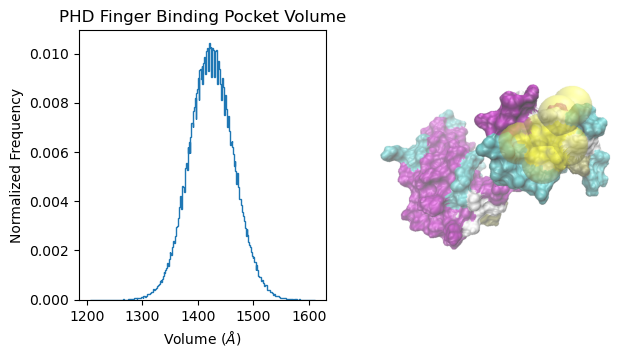

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load graphic
image = Image.open('pocket.png')

# Load data
x = np.loadtxt("fingerex_epock.dat", usecols=(1), unpack=True, comments=('#','@','&'))


fig, ax = plt.subplot_mosaic([['figure', 'picture']], figsize=(7, 3.5))

ax['picture'].imshow(image)
ax['picture'].axis('off')  # clear axes from graphic

im = ax['figure'].hist(x, bins=300, density=True, histtype='step')
ax['figure'].set_xlabel('Volume ($\AA$)')
ax['figure'].set_ylabel('Normalized Frequency')


ax['figure'].set_title('PHD Finger Binding Pocket Volume')

plt.show()



/var/folders/dy/rf4mxz6x6v97qwjpc9pp5yw40000gn/T/ipykernel_86486/1094213604.py:153: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


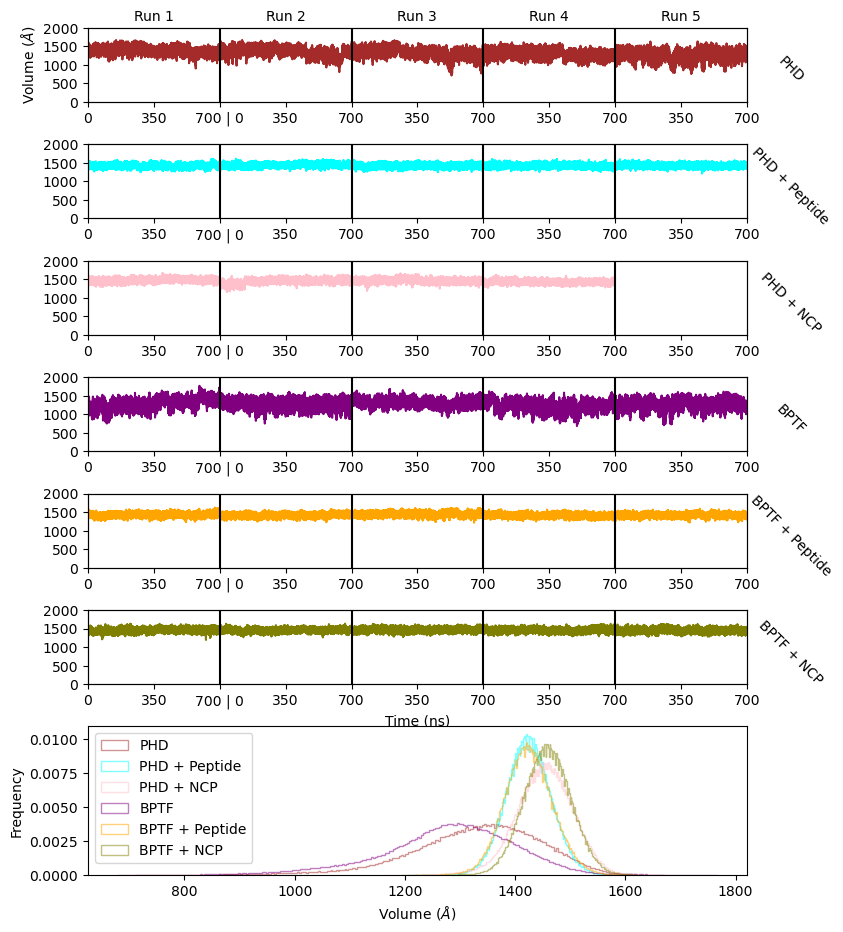

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load graphic
image = Image.open('pocket.png')
font = {'family': 'sans-serif',
        'color': 'black',
        'weight': 'normal',
        'size': 10,  # Adjusted font size
        }

xlabels = ('0', '350', '700 | 0', '350', '700', '350', '700', '350', '700', '350', '700')
ylabels = ('0', '500', '1000', '1500', '2000')

x, y1 = np.loadtxt('finger1-5_epock.dat', usecols=(0, 1), unpack=True, comments=('#'))
y2 = np.loadtxt('fingerex_epock.dat', usecols=(1), unpack=True, comments=('#'))
x2, y3 = np.loadtxt('EnoBfinger_epock.dat', usecols=(0, 1), unpack=True, comments=('#'))
z1 = np.loadtxt('NoTailfinger_epock.dat', usecols=(1), unpack=True, comments=('#'))
z2 = np.loadtxt('2f6jexfinger_epock.dat', usecols=(1), unpack=True, comments=('#'))
z3 = np.loadtxt('Efinger_epock.dat', usecols=(1), unpack=True, comments=('#'))

# Create a figure and gridspec for the main plot and histogram
fig = plt.figure(figsize=(8.5, 11))  # Standard letter size
gs = GridSpec(7, 1, height_ratios=[1] * 6 + [2], hspace=0.5)  # Adjusted height ratios

# Time Series 1
ax1 = plt.subplot(gs[0])
ax1.plot(x / 100, y1, color='brown')
ax1.set_xlim(0, 3500)
ax1.set_ylim(0, 2000)
ax1.axvline(x=700, color='black')
ax1.axvline(x=1400, color='black')
ax1.axvline(x=2100, color='black')
ax1.axvline(x=2800, color='black')
ax1.set_xticks(np.arange(0, 3850, 350))
ax1.set_xticklabels(xlabels, fontdict=font)
ax1.set_yticks(np.arange(0, 2500, 500))
ax1.set_yticklabels(ylabels, fontdict=font)
ax1.set_ylabel('Volume ($\AA$)', fontdict=font)
ax2 = ax1.twinx()
ax2.set_yticks([])
ax2.set_ylabel('PHD', rotation=315,  labelpad=35, fontdict=font)
xmin, xmax = ax1.get_xlim()
section_width = (xmax - xmin) / 5.0
for j in range(1, 6):
    text_x = xmin + (j - 0.5) * section_width
    text_y = ax1.get_ylim()[1] * 1.15  # Adjust the vertical position
    ax1.text(text_x, text_y, f'Run {j}', ha='center', va='center', fontdict=font)

# Time Series 2
ax3 = plt.subplot(gs[1])
ax3.plot(x / 100, y2, color='cyan')
ax3.set_xlim(0, 3500)
ax3.set_ylim(0, 2000)
ax3.axvline(x=700, color='black')
ax3.axvline(x=1400, color='black')
ax3.axvline(x=2100, color='black')
ax3.axvline(x=2800, color='black')
ax3.set_xticks(np.arange(0, 3850, 350))
ax3.set_xticklabels(xlabels, fontdict=font)
ax3.set_yticks(np.arange(0, 2500, 500))
ax3.set_yticklabels(ylabels, fontdict=font)
ax4 = ax3.twinx()
ax4.set_yticks([])
ax4.set_ylabel('PHD + Peptide', rotation=315,  labelpad=35, fontdict=font)


# Time Series 3
ax5 = plt.subplot(gs[2])
ax5.plot(x2 / 100, y3, color='pink')
ax5.set_xlim(0, 3500)
ax5.set_ylim(0, 2000)
ax5.axvline(x=700, color='black')
ax5.axvline(x=1400, color='black')
ax5.axvline(x=2100, color='black')
ax5.axvline(x=2800, color='black')
ax5.set_xticks(np.arange(0, 3850, 350))
ax5.set_xticklabels(xlabels, fontdict=font)
ax5.set_yticks(np.arange(0, 2500, 500))
ax5.set_yticklabels(ylabels, fontdict=font)
ax6 = ax5.twinx()
ax6.set_yticks([])
ax6.set_ylabel('PHD + NCP', rotation=315,  labelpad=35, fontdict=font)

# Time Series 4
ax7 = plt.subplot(gs[3])
ax7.plot(x / 100, z1, color='purple')
ax7.set_xlim(0, 3500)
ax7.set_ylim(0, 2000)
ax7.axvline(x=700, color='black')
ax7.axvline(x=1400, color='black')
ax7.axvline(x=2100, color='black')
ax7.axvline(x=2800, color='black')
ax7.set_xticks(np.arange(0, 3850, 350))
ax7.set_xticklabels(xlabels, fontdict=font)
ax7.set_yticks(np.arange(0, 2500, 500))
ax7.set_yticklabels(ylabels, fontdict=font)
ax8 = ax7.twinx()
ax8.set_yticks([])
ax8.set_ylabel('BPTF', rotation=315,  labelpad=35, fontdict=font)

# Time Series 5
ax9 = plt.subplot(gs[4])
ax9.plot(x / 100, z2, color='orange')
ax9.set_xlim(0, 3500)
ax9.set_ylim(0, 2000)
ax9.axvline(x=700, color='black')
ax9.axvline(x=1400, color='black')
ax9.axvline(x=2100, color='black')
ax9.axvline(x=2800, color='black')
ax9.set_xticks(np.arange(0, 3850, 350))
ax9.set_xticklabels(xlabels, fontdict=font)
ax9.set_yticks(np.arange(0, 2500, 500))
ax9.set_yticklabels(ylabels, fontdict=font)
ax10 = ax9.twinx()
ax10.set_yticks([])
ax10.set_ylabel('BPTF + Peptide', rotation=315,  labelpad=35, fontdict=font)

# Time Series 6
ax11 = plt.subplot(gs[5])
ax11.plot(x / 100, z3, color='olive')
ax11.set_xlim(0, 3500)
ax11.set_ylim(0, 2000)
ax11.axvline(x=700, color='black')
ax11.axvline(x=1400, color='black')
ax11.axvline(x=2100, color='black')
ax11.axvline(x=2800, color='black')
ax11.set_xticks(np.arange(0, 3850, 350))
ax11.set_xlabel('Time (ns)', fontdict=font)
ax11.set_xticklabels(xlabels, fontdict=font)
ax11.set_yticks(np.arange(0, 2500, 500))
ax11.set_yticklabels(ylabels, fontdict=font)
ax12 = ax11.twinx()
ax12.set_yticks([])
ax12.set_ylabel('BPTF + NCP', rotation=315,  labelpad=35, fontdict=font)

# Combined Histogram
ax13 = plt.subplot(gs[6])
ax13.hist(y1, alpha=0.5, bins=300, density=True, label='PHD', color='brown', histtype='step')
ax13.hist(y2, alpha=0.5, bins=300, density=True, label='PHD + Peptide', color='cyan', histtype='step')
ax13.hist(y3, alpha=0.5, bins=300, density=True, label='PHD + NCP', color='pink', histtype='step')
ax13.hist(z1, alpha=0.5, bins=300, density=True, label='BPTF', color='purple', histtype='step')
ax13.hist(z2, alpha=0.5, bins=300, density=True, label='BPTF + Peptide', color='orange', histtype='step')
ax13.hist(z3, alpha=0.5, bins=300, density=True, label='BPTF + NCP', color='olive', histtype='step')
ax13.legend()
ax13.set_ylabel('Frequency', fontdict=font)
ax13.set_xlabel('Volume ($\AA$)', fontdict=font)
plt.savefig('pocket_volume.pdf', dpi=300)
plt.tight_layout()
plt.show()




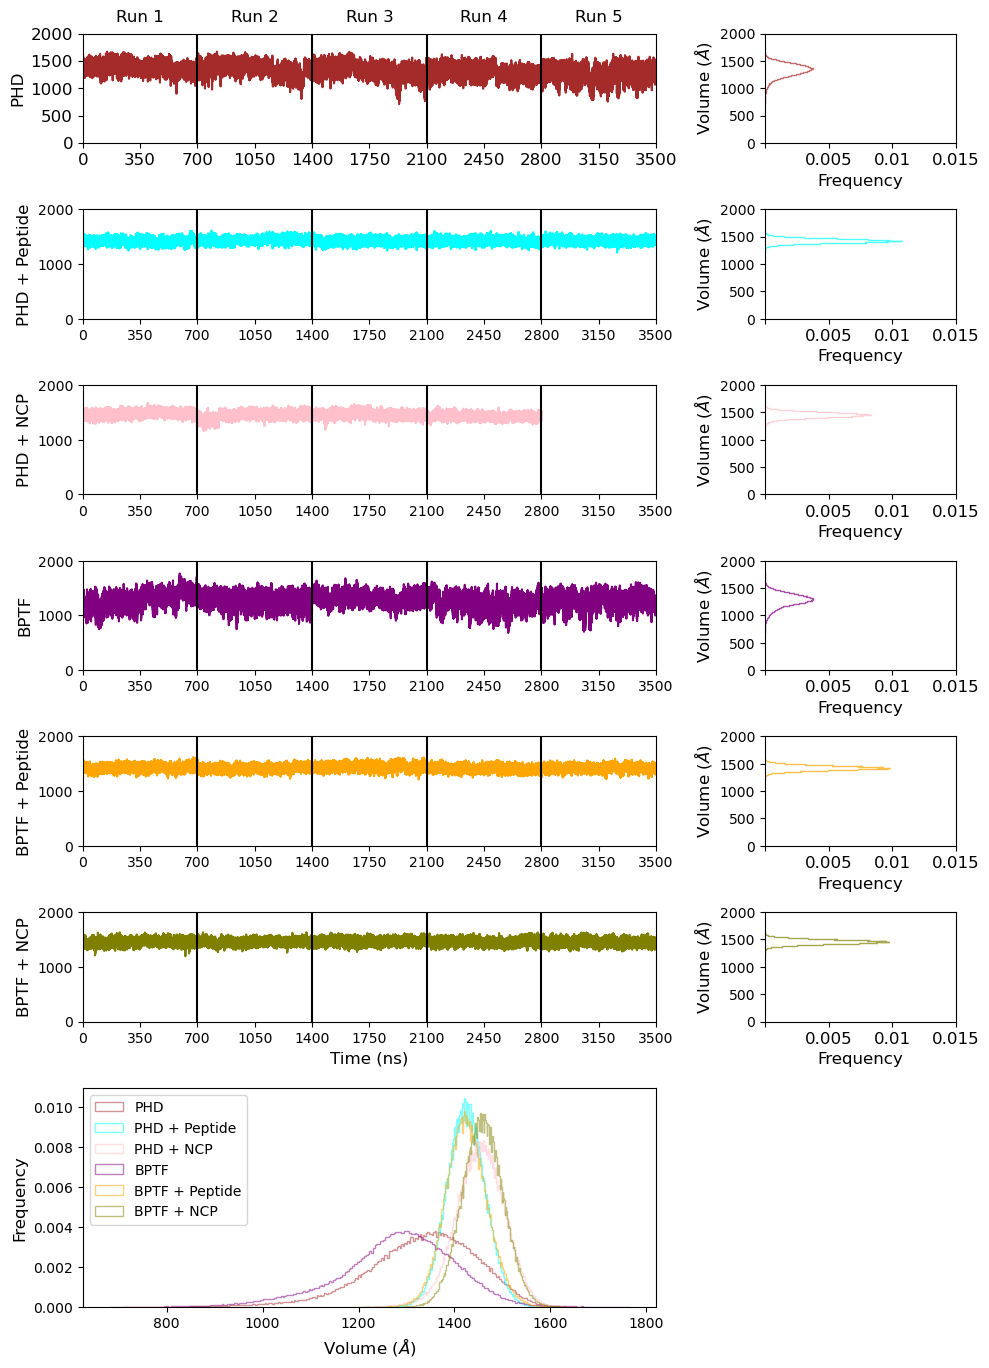

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load graphic
image = Image.open('pocket.png')

font = {'family': 'sans-serif',
        'color': 'black',
        'weight': 'normal',
        'size': 12,  # Adjusted font size
        }

xlabels = ('0', '350', '700', '1050', '1400', '1750', '2100', '2450', '2800', '3150', '3500')
ylabels = ('0', '500', '1000', '1500', '2000')

x, y1 = np.loadtxt('finger1-5_epock.dat', usecols=(0, 1), unpack=True, comments=('#'))
y2 = np.loadtxt('fingerex_epock.dat', usecols=(1), unpack=True, comments=('#'))
x2, y3 = np.loadtxt('EnoBfinger_epock.dat', usecols=(0, 1), unpack=True, comments=('#'))
z1 = np.loadtxt('NoTailfinger_epock.dat', usecols=(1), unpack=True, comments=('#'))
z2 = np.loadtxt('2f6jexfinger_epock.dat', usecols=(1), unpack=True, comments=('#'))
z3 = np.loadtxt('Efinger_epock.dat', usecols=(1), unpack=True, comments=('#'))

# Create a figure and gridspec for the main plot and histogram
fig = plt.figure(figsize=(10, 15))  # Adjusted figure size
gs = GridSpec(8, 2, width_ratios=[3, 1], height_ratios=[1] * 6 + [2, 1])

# Time Series 1
ax1 = plt.subplot(gs[0, 0])
ax1.plot(x / 100, y1, color='brown')
ax1.set_xlim(0, 3500)
ax1.set_ylim(0, 2000)
ax1.axvline(x=700, color='black')
ax1.axvline(x=1400, color='black')
ax1.axvline(x=2100, color='black')
ax1.axvline(x=2800, color='black')
ax1.set_xticks(np.arange(0, 3850, 350))
ax1.set_xticklabels(xlabels, fontdict=font)
ax1.set_yticks(np.arange(0, 2500, 500))
ax1.set_yticklabels(ylabels, fontdict=font)
ax1.set_ylabel('PHD', fontdict=font)

xmin, xmax = ax1.get_xlim()
section_width = (xmax - xmin) / 5.0
for j in range(1, 6):
    text_x = xmin + (j - 0.5) * section_width
    text_y = ax1.get_ylim()[1] * 1.15  # Adjust the vertical position
    ax1.text(text_x, text_y, f'Run {j}', ha='center', va='center', fontdict=font)

# Histogram 1
ax2 = plt.subplot(gs[0, 1], sharey=ax1)
ax2.hist(y1, bins=200, alpha=0.7, orientation='horizontal', histtype='step', density=True, color='brown')
ax2.set_xlim(0, 0.015)
ax2.set_xticks(np.arange(0, 0.020, 0.005))
ax2.set_xticklabels(('', '0.005', '0.01', '0.015'), fontdict=font)
ax2.set_xlabel('Frequency', fontdict=font)
ax2.set_ylabel('Volume ($\AA$)', fontdict=font)

# Time Series 2
ax3 = plt.subplot(gs[1, 0])
ax3.plot(x / 100, y2, color='cyan')
ax3.set_xlim(0, 3500)
ax3.set_ylim(0, 2000)
ax3.axvline(x=700, color='black')
ax3.axvline(x=1400, color='black')
ax3.axvline(x=2100, color='black')
ax3.axvline(x=2800, color='black')
ax3.set_xticks(np.arange(0, 3850, 350))
ax3.set_ylabel('PHD + Peptide', fontdict=font)

# Histogram 2
ax4 = plt.subplot(gs[1, 1], sharey=ax1, sharex=ax2)
ax4.hist(y2, bins=200, alpha=0.7, orientation='horizontal', histtype='step', density=True, color='cyan')
ax4.set_xlim(0, 0.015)
ax4.set_xticks(np.arange(0, 0.020, 0.005))
ax4.set_xticklabels(('', '0.005', '0.01', '0.015'), fontdict=font)
ax4.set_xlabel('Frequency', fontdict=font)
ax4.set_ylabel('Volume ($\AA$)', fontdict=font)

# Time Series 3
ax5 = plt.subplot(gs[2, 0])
ax5.plot(x2 / 100, y3, color='pink')
ax5.set_xlim(0, 3500)
ax5.set_ylim(0, 2000)
ax5.axvline(x=700, color='black')
ax5.axvline(x=1400, color='black')
ax5.axvline(x=2100, color='black')
ax5.axvline(x=2800, color='black')
ax5.set_xticks(np.arange(0, 3850, 350))
ax5.set_ylabel('PHD + NCP', fontdict=font)

# Histogram 3
ax6 = plt.subplot(gs[2, 1], sharey=ax1, sharex=ax2)
ax6.hist(y3, bins=200, alpha=0.7, orientation='horizontal', histtype='step', density=True, color='pink')
ax6.set_xlim(0, 0.015)
ax6.set_xticks(np.arange(0, 0.020, 0.005))
ax6.set_xticklabels(('', '0.005', '0.01', '0.015'), fontdict=font)
ax6.set_xlabel('Frequency', fontdict=font)
ax6.set_ylabel('Volume ($\AA$)', fontdict=font)

# Time Series 4
ax7 = plt.subplot(gs[3, 0])
ax7.plot(x / 100, z1, color='purple')
ax7.set_xlim(0, 3500)
ax7.set_ylim(0, 2000)
ax7.axvline(x=700, color='black')
ax7.axvline(x=1400, color='black')
ax7.axvline(x=2100, color='black')
ax7.axvline(x=2800, color='black')
ax7.set_xticks(np.arange(0, 3850, 350))
ax7.set_ylabel('BPTF', fontdict=font)

# Histogram 4
ax8 = plt.subplot(gs[3, 1], sharey=ax1, sharex=ax2)
ax8.hist(z1, bins=200, alpha=0.7, orientation='horizontal', histtype='step', density=True, color='purple')
ax8.set_xlabel('Frequency', fontdict=font)
ax8.set_xlim(0, 0.015)
ax8.set_xticks(np.arange(0, 0.020, 0.005))
ax8.set_xticklabels(('', '0.005', '0.01', '0.015'), fontdict=font)
ax8.set_ylabel('Volume ($\AA$)', fontdict=font)

# Time Series 5
ax9 = plt.subplot(gs[4, 0])
ax9.plot(x / 100, z2, color='orange')
ax9.set_xlim(0, 3500)
ax9.set_ylim(0, 2000)
ax9.axvline(x=700, color='black')
ax9.axvline(x=1400, color='black')
ax9.axvline(x=2100, color='black')
ax9.axvline(x=2800, color='black')
ax9.set_xticks(np.arange(0, 3850, 350))
ax9.set_ylabel('BPTF + Peptide', fontdict=font)

# Histogram 5
ax10 = plt.subplot(gs[4, 1], sharey=ax1, sharex=ax2)
ax10.hist(z2, bins=200, alpha=0.7, orientation='horizontal', histtype='step', density=True, color='orange')
ax10.set_xlabel('Frequency', fontdict=font)
ax10.set_xlim(0, 0.015)
ax10.set_xticks(np.arange(0, 0.020, 0.005))
ax10.set_xticklabels(('', '0.005', '0.01', '0.015'), fontdict=font)
ax10.set_ylabel('Volume ($\AA$)', fontdict=font)

# Time Series 6
ax11 = plt.subplot(gs[5, 0])
ax11.plot(x / 100, z3, color='olive')
ax11.set_xlim(0, 3500)
ax11.set_ylim(0, 2000)
ax11.axvline(x=700, color='black')
ax11.axvline(x=1400, color='black')
ax11.axvline(x=2100, color='black')
ax11.axvline(x=2800, color='black')
ax11.set_xticks(np.arange(0, 3850, 350))
ax11.set_xlabel('Time (ns)', fontdict=font)
ax11.set_ylabel('BPTF + NCP', fontdict=font)

# Histogram 6
ax12 = plt.subplot(gs[5, 1], sharey=ax1, sharex=ax2)
ax12.hist(z3, bins=200, alpha=0.7, orientation='horizontal', histtype='step', density=True, color='olive')
ax12.set_xlabel('Frequency', fontdict=font)
ax12.set_xlim(0, 0.015)
ax12.set_xticks(np.arange(0, 0.020, 0.005))
ax12.set_xticklabels(('', '0.005', '0.01', '0.015'), fontdict=font)
ax12.set_ylabel('Volume ($\AA$)', fontdict=font)

# Combined Histogram
ax13 = plt.subplot(gs[6, 0])
ax13.hist(y1, alpha=0.5, bins=300, density=True, label='PHD', color='brown', histtype='step')
ax13.hist(y2, alpha=0.5, bins=300, density=True, label='PHD + Peptide', color='cyan', histtype='step')
ax13.hist(y3, alpha=0.5, bins=300, density=True, label='PHD + NCP', color='pink', histtype='step')
ax13.hist(z1, alpha=0.5, bins=300, density=True, label='BPTF', color='purple', histtype='step')
ax13.hist(z2, alpha=0.5, bins=300, density=True, label='BPTF + Peptide', color='orange', histtype='step')
ax13.hist(z3, alpha=0.5, bins=300, density=True, label='BPTF + NCP', color='olive', histtype='step')
ax13.legend()
ax13.set_ylabel('Frequency', fontdict=font)
ax13.set_xlabel('Volume ($\AA$)', fontdict=font)
plt.subplots_adjust(hspace=0.5, bottom=0.1)  # Adjusted bottom parameter
plt.tight_layout()
plt.savefig('pocket_volume.pdf')
plt.show()


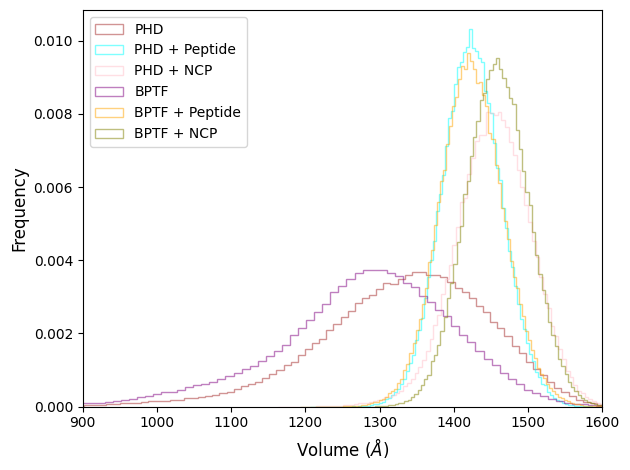

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

font = {'family': 'sans-serif',
        'color': 'black',
        'weight': 'normal',
        'size': 12,  # Adjusted font size
        }
# Load graphic
#image = Image.open('pocket.png')

# Load data
x, y1 = np.loadtxt('finger1-5_epock.dat', usecols=(0, 1), unpack=True, comments=('#'))
y2 = np.loadtxt('fingerex_epock.dat', usecols=(1), unpack=True, comments=('#'))
x2, y3 = np.loadtxt('EnoBfinger_epock.dat', usecols=(0, 1), unpack=True, comments=('#'))
z1 = np.loadtxt('NoTailfinger_epock.dat', usecols=(1), unpack=True, comments=('#'))
z2 = np.loadtxt('2f6jexfinger_epock.dat', usecols=(1), unpack=True, comments=('#'))
z3 = np.loadtxt('Efinger_epock.dat', usecols=(1), unpack=True, comments=('#'))


#fig, ax = plt.subplot_mosaic([['figure', 'picture']], figsize=(6.5, 3.5), width_ratios=(1.8,1))

#ax['picture'].imshow(image)
#ax['picture'].axis('off')  # clear axes from graphic

#ax['figure'].hist(x, bins=300, density=True, histtype='step')
#ax['figure'].hist(y1, alpha=0.5, bins=300, density=True, label='PHD', color='brown', histtype='step')
#ax['figure'].hist(y2, alpha=0.5, bins=300, density=True, label='PHD + Peptide', color='cyan', histtype='step')
#ax['figure'].hist(y3, alpha=0.5, bins=300, density=True, label='PHD + NCP', color='pink', histtype='step')
#ax['figure'].hist(z1, alpha=0.5, bins=300, density=True, label='BPTF', color='purple', histtype='step')
#ax['figure'].hist(z2, alpha=0.5, bins=300, density=True, label='BPTF + Peptide', color='orange', histtype='step')
#ax['figure'].hist(z3, alpha=0.5, bins=300, density=True, label='BPTF + NCP', color='olive', histtype='step')
#ax['figure'].legend()
#ax['figure'].set_ylabel('Frequency', fontdict=font)
#ax['figure'].set_xlabel('Volume ($\AA$)', fontdict=font)
#ax['figure'].set_xlim(900,1600)
#ax['figure'].set_xlabel('Volume ($\AA$)')
#ax['figure'].set_ylabel('Normalized Frequency')

#plt.subplots_adjust(hspace=0.5, bottom=0.1)  # Adjusted bottom parameter

#ax['figure'].set_title('PHD Finger Binding Pocket Volume')

plt.hist(y1, alpha=0.5, bins=100, density=True, label='PHD', color='brown', histtype='step')
plt.hist(y2, alpha=0.5, bins=100, density=True, label='PHD + Peptide', color='cyan', histtype='step')
plt.hist(y3, alpha=0.5, bins=100, density=True, label='PHD + NCP', color='pink', histtype='step')
plt.hist(z1, alpha=0.5, bins=100, density=True, label='BPTF', color='purple', histtype='step')
plt.hist(z2, alpha=0.5, bins=100, density=True, label='BPTF + Peptide', color='orange', histtype='step')
plt.hist(z3, alpha=0.5, bins=100, density=True, label='BPTF + NCP', color='olive', histtype='step')
plt.legend()
plt.ylabel('Frequency', fontdict=font)
plt.xlabel('Volume ($\AA$)', fontdict=font)
plt.xlim(900,1600)
plt.tight_layout()

plt.savefig('binding_pocket_volume100.pdf')
plt.show()


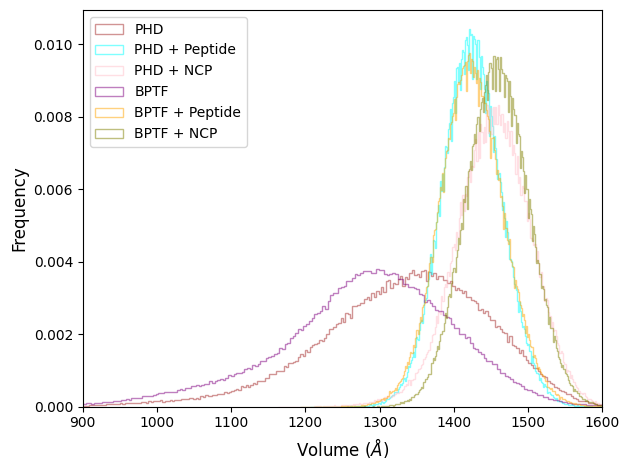

In [2]:
plt.hist(y1, alpha=0.5, bins=300, density=True, label='PHD', color='brown', histtype='step')
plt.hist(y2, alpha=0.5, bins=300, density=True, label='PHD + Peptide', color='cyan', histtype='step')
plt.hist(y3, alpha=0.5, bins=300, density=True, label='PHD + NCP', color='pink', histtype='step')
plt.hist(z1, alpha=0.5, bins=300, density=True, label='BPTF', color='purple', histtype='step')
plt.hist(z2, alpha=0.5, bins=300, density=True, label='BPTF + Peptide', color='orange', histtype='step')
plt.hist(z3, alpha=0.5, bins=300, density=True, label='BPTF + NCP', color='olive', histtype='step')
plt.legend()
plt.ylabel('Frequency', fontdict=font)
plt.xlabel('Volume ($\AA$)', fontdict=font)
plt.xlim(900,1600)
plt.tight_layout()
plt.savefig('binding_pocket_volume300.pdf')

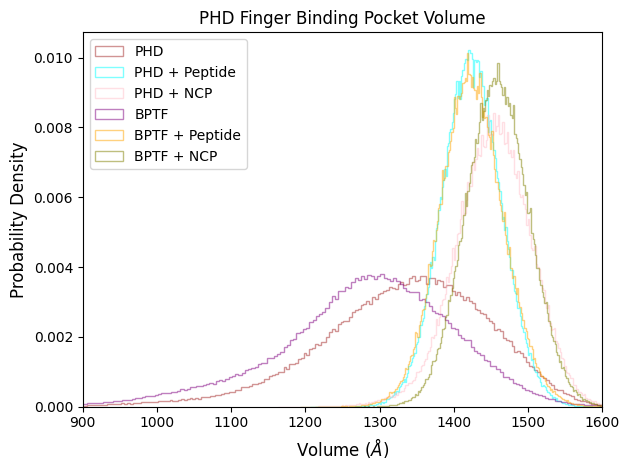

In [2]:
# Paper Figure

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

font = {'family': 'sans-serif',
        'color': 'black',
        'weight': 'normal',
        'size': 12,  # Adjusted font size
        }
# Load graphic
#image = Image.open('pocket.png')

# Load data
x, y1 = np.loadtxt('finger1-5_epock.dat', usecols=(0, 1), unpack=True, comments=('#'))
y2 = np.loadtxt('fingerex_epock.dat', usecols=(1), unpack=True, comments=('#'))
x2, y3 = np.loadtxt('EnoBfinger_epock.dat', usecols=(0, 1), unpack=True, comments=('#'))
z1 = np.loadtxt('NoTailfinger_epock.dat', usecols=(1), unpack=True, comments=('#'))
z2 = np.loadtxt('2f6jexfinger_epock.dat', usecols=(1), unpack=True, comments=('#'))
z3 = np.loadtxt('Efinger_epock.dat', usecols=(1), unpack=True, comments=('#'))

plt.hist(y1, alpha=0.5, bins=250, density=True, label='PHD', color='brown', histtype='step')
plt.hist(y2, alpha=0.5, bins=250, density=True, label='PHD + Peptide', color='cyan', histtype='step')
plt.hist(y3, alpha=0.5, bins=250, density=True, label='PHD + NCP', color='pink', histtype='step')
plt.hist(z1, alpha=0.5, bins=250, density=True, label='BPTF', color='purple', histtype='step')
plt.hist(z2, alpha=0.5, bins=250, density=True, label='BPTF + Peptide', color='orange', histtype='step')
plt.hist(z3, alpha=0.5, bins=250, density=True, label='BPTF + NCP', color='olive', histtype='step')
plt.legend()
plt.title('PHD Finger Binding Pocket Volume')
plt.ylabel('Probability Density', fontdict=font)
plt.xlabel('Volume ($\AA$)', fontdict=font)
plt.xlim(900,1600)
plt.tight_layout()
plt.savefig('binding_pocket_volume250.pdf')

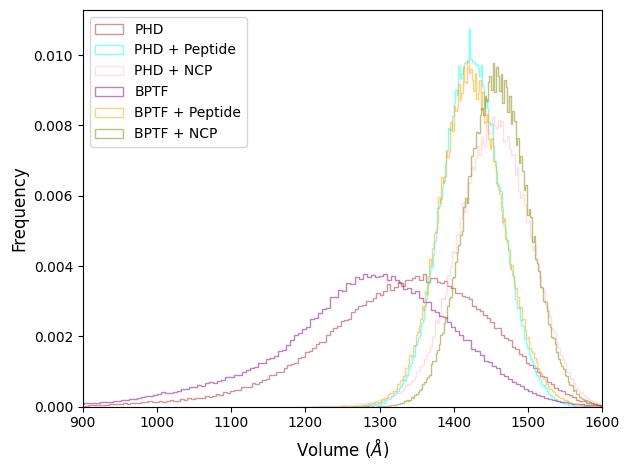

In [4]:
plt.hist(y1, alpha=0.5, bins=200, density=True, label='PHD', color='brown', histtype='step')
plt.hist(y2, alpha=0.5, bins=200, density=True, label='PHD + Peptide', color='cyan', histtype='step')
plt.hist(y3, alpha=0.5, bins=200, density=True, label='PHD + NCP', color='pink', histtype='step')
plt.hist(z1, alpha=0.5, bins=200, density=True, label='BPTF', color='purple', histtype='step')
plt.hist(z2, alpha=0.5, bins=200, density=True, label='BPTF + Peptide', color='orange', histtype='step')
plt.hist(z3, alpha=0.5, bins=200, density=True, label='BPTF + NCP', color='olive', histtype='step')
plt.legend()
plt.ylabel('Frequency', fontdict=font)
plt.xlabel('Volume ($\AA$)', fontdict=font)
plt.xlim(900,1600)
plt.tight_layout()
plt.savefig('binding_pocket_volume200.pdf')

In [7]:
print('Free finger average is ' + str(stat.mean(y1)) + ' +/- ' + str(stat.stdev(y1/2.2)))

print("Peptide bound finger average is " + str(stat.mean(y2)) + " +/- " + str(stat.stdev(y2/2.2)))
print("NCP bound finger average is " + str(stat.mean(y3)) + " +/- " + str(stat.stdev(y3/2)))
print("Free bptf average is " + str(stat.mean(z1)) + " +/- " + str(stat.stdev(z1/2.2)))
print("Peptide bound bptf average is " + str(stat.mean(z2)) + " +/- " + str(stat.stdev(z2/2.2)))
print("NCP bound bptf average is " + str(stat.mean(z3)) + " +/- " + str(stat.stdev(z3/2.2)))

Free finger average is 1330.9834881142858 +/- 51.93331088495243
Peptide bound finger average is 1423.653841 +/- 18.36322313986982
NCP bound finger average is 1452.290985642857 +/- 25.517084185063354
Free bptf average is 1279.8307309142858 +/- 54.14941733164241
Peptide bound bptf average is 1423.7823683428571 +/- 19.747617798781704
NCP bound bptf average is 1457.9046865142857 +/- 19.42590977053401


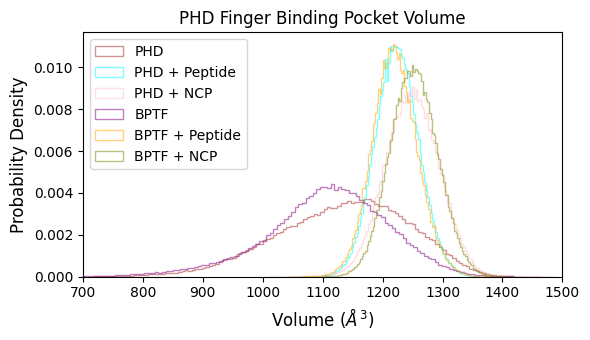

In [6]:
# Main body paper figure

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

font = {'family': 'sans-serif',
        'color': 'black',
        'weight': 'normal',
        'size': 12,  # Adjusted font size
        }

x, y = np.loadtxt('notnob_volume.dat',unpack=True,usecols=(0,1),comments=('#'))
ay=y[0:100000]
by=y[100000:200000]
cy=y[200000:300000]
dy=y[300000:400000]
ey=y[400000::]
yy = np.concatenate((ay[-70000:],by[-70000:],cy[-70000:],dy[-70000:],ey[-70000:]))

y1 = np.loadtxt('fingerex_volume.dat',unpack=True,usecols=(1),comments=('#'))
ay1=y1[0:100000]
by1=y1[100000:200000]
cy1=y1[200000:300000]
dy1=y1[300000:400000]
ey1=y1[400000::]
yy1 = np.concatenate((ay1[-70000:],by1[-70000:],cy1[-70000:],dy1[-70000:],ey1[-70000:]))

y2 = np.loadtxt('notail_volume.dat',unpack=True,usecols=(1),comments=('#'))
ay2=y2[0:100000]
by2=y2[100000:200000]
cy2=y2[200000:300000]
dy2=y2[300000:400000]
ey2=y2[400000::]
yy2 = np.concatenate((ay2[-70000:],by2[-70000:],cy2[-70000:],dy2[-70000:],ey2[-70000:]))

y3 = np.loadtxt('2f6jex_volume.dat',unpack=True,usecols=(1),comments=('#'))
ay3=y3[0:100000]
by3=y3[100000:200000]
cy3=y3[200000:300000]
dy3=y3[300000:400000]
ey3=y3[400000::]
yy3 = np.concatenate((ay3[-70000:],by3[-70000:],cy3[-70000:],dy3[-70000:],ey3[-70000:]))

y4 = np.loadtxt('EnoB_volume.dat',unpack=True,usecols=(1),comments=('#'))
ay4=y4[0:100000]
by4=y4[100000:200000]
cy4=y4[200000:300000]
dy4=y4[300000:400000]
ey4=y4[400000::]
yy4 = np.concatenate((ay4[-70000:],by4[-70000:],cy4[-70000:],dy4[-70000:],ey4[-70000:]))

y5 = np.loadtxt('E_volume.dat',unpack=True,usecols=(1),comments=('#'))
ay5=y5[0:100000]
by5=y5[100000:200000]
cy5=y5[200000:300000]
dy5=y5[300000:400000]
ey5=y5[400000::]
yy5 = np.concatenate((ay5[-70000:],by5[-70000:],cy5[-70000:],dy5[-70000:],ey5[-70000:]))

plt.figure(figsize=(6,3.5))
plt.hist(yy, alpha=0.5, bins=150, density=True, label='PHD', color='brown', histtype='step')
plt.hist(yy1, alpha=0.5, bins=150, density=True, label='PHD + Peptide', color='cyan', histtype='step')
plt.hist(yy4, alpha=0.5, bins=150, density=True, label='PHD + NCP', color='pink', histtype='step')
plt.hist(yy2, alpha=0.5, bins=150, density=True, label='BPTF', color='purple', histtype='step')
plt.hist(yy3, alpha=0.5, bins=150, density=True, label='BPTF + Peptide', color='orange', histtype='step')
plt.hist(yy5, alpha=0.5, bins=150, density=True, label='BPTF + NCP', color='olive', histtype='step')
plt.legend()
plt.title('PHD Finger Binding Pocket Volume')
plt.ylabel('Probability Density', fontdict=font)
plt.xlabel(r'Volume ($\AA^3$)', fontdict=font)
plt.xlim(700,1500)
plt.tight_layout()
plt.savefig('binding_pocket_volume.pdf')

In [8]:
len(x)

500000

/var/folders/_x/hb8mn6nd20v0bmj40xygm4n80000gn/T/ipykernel_67796/898194965.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


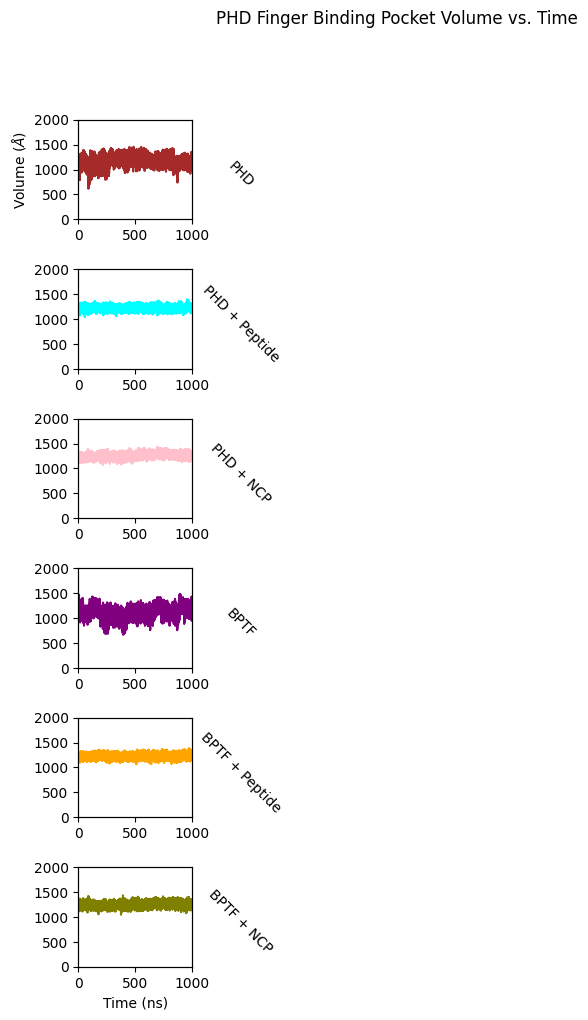

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load graphic
image = Image.open('pocket.png')
font = {'family': 'sans-serif',
        'color': 'black',
        'weight': 'normal',
        'size': 10,  # Adjusted font size
        }


# Create a figure and gridspec for the main plot and histogram
fig = plt.figure(figsize=(8.5, 11))  # Standard letter size
gs = GridSpec(6, 5, hspace=0.5)  # Adjusted height ratios

# Time Series 1
ax1 = plt.subplot(gs[0,0])
ax1.plot(x / 100, y, color='brown')
ax1.set_xlim(0, 1000)
ax1.set_ylim(0, 2000)
ax1.set_xticks(np.arange(0, 1500, 500))
#ax1.set_xticklabels(xlabels, fontdict=font)
ax1.set_yticks(np.arange(0, 2500, 500))
#ax1.set_yticklabels(ylabels, fontdict=font)
ax1.set_ylabel('Volume ($\AA$)', fontdict=font)
#ax1.set_title('PHD Finger Pocket Volume vs. Time')
ax2 = ax1.twinx()
ax2.set_yticks([])
ax2.set_ylabel('PHD', rotation=315,  labelpad=35, fontdict=font)
xmin, xmax = ax1.get_xlim()
section_width = (xmax - xmin) / 5.0
#for j in range(1, 6):
#    text_x = xmin + (j - 0.5) * section_width
#    text_y = ax1.get_ylim()[1] * 1.15  # Adjust the vertical position
#    ax1.text(text_x, text_y, f'Run {j}', ha='center', va='center', fontdict=font)

# Time Series 2
ax3 = plt.subplot(gs[1,0])
ax3.plot(x / 100, y1, color='cyan')
ax3.set_xlim(0, 1000)
ax3.set_ylim(0, 2000)
ax3.set_xticks(np.arange(0, 1500, 500))
#ax3.set_xticklabels(xlabels, fontdict=font)
ax3.set_yticks(np.arange(0, 2500, 500))
#ax3.set_yticklabels(ylabels, fontdict=font)
ax4 = ax3.twinx()
ax4.set_yticks([])
ax4.set_ylabel('PHD + Peptide', rotation=315,  labelpad=35, fontdict=font)


# Time Series 3
ax5 = plt.subplot(gs[2,0])
ax5.plot(x / 100, y4, color='pink')
ax5.set_xlim(0, 1000)
ax5.set_ylim(0, 2000)
ax5.set_xticks(np.arange(0, 1500, 500))
#ax5.set_xticklabels(xlabels, fontdict=font)
ax5.set_yticks(np.arange(0, 2500, 500))
#ax5.set_yticklabels(ylabels, fontdict=font)
ax6 = ax5.twinx()
ax6.set_yticks([])
ax6.set_ylabel('PHD + NCP', rotation=315,  labelpad=35, fontdict=font)

# Time Series 4
ax7 = plt.subplot(gs[3,0])
ax7.plot(x / 100, y2, color='purple')
ax7.set_xlim(0, 1000)
ax7.set_ylim(0, 2000)
ax7.set_xticks(np.arange(0, 1500, 500))
#ax7.set_xticklabels(xlabels, fontdict=font)
ax7.set_yticks(np.arange(0, 2500, 500))
#ax7.set_yticklabels(ylabels, fontdict=font)
ax8 = ax7.twinx()
ax8.set_yticks([])
ax8.set_ylabel('BPTF', rotation=315,  labelpad=35, fontdict=font)

# Time Series 5
ax9 = plt.subplot(gs[4,0])
ax9.plot(x / 100, y3, color='orange')
ax9.set_xlim(0, 1000)
ax9.set_ylim(0, 2000)
ax9.set_xticks(np.arange(0, 1500, 500))
#ax9.set_xticklabels(xlabels, fontdict=font)
ax9.set_yticks(np.arange(0, 2500, 500))
#ax9.set_yticklabels(ylabels, fontdict=font)
ax10 = ax9.twinx()
ax10.set_yticks([])
ax10.set_ylabel('BPTF + Peptide', rotation=315,  labelpad=35, fontdict=font)

# Time Series 6
ax11 = plt.subplot(gs[5,0])
ax11.plot(x / 100, y5, color='olive')
ax11.set_xlim(0, 1000)
ax11.set_ylim(0, 2000)
ax11.set_xticks(np.arange(0, 1500, 500))
ax11.set_xlabel('Time (ns)', fontdict=font)
#ax11.set_xticklabels(xlabels, fontdict=font)
ax11.set_yticks(np.arange(0, 2500, 500))
#ax11.set_yticklabels(ylabels, fontdict=font)
ax12 = ax11.twinx()
ax12.set_yticks([])
ax12.set_ylabel('BPTF + NCP', rotation=315,  labelpad=35, fontdict=font)

# Combined Histogram
#ax13 = plt.subplot(gs[6,0])
#ax13.hist(y, alpha=0.5, bins=150, density=True, label='PHD', color='brown', histtype='step')
#ax13.hist(y1, alpha=0.5, bins=150, density=True, label='PHD + Peptide', color='cyan', histtype='step')
#ax13.hist(y4, alpha=0.5, bins=150, density=True, label='PHD + NCP', color='pink', histtype='step')
#ax13.hist(y2, alpha=0.5, bins=150, density=True, label='BPTF', color='purple', histtype='step')
#ax13.hist(y3, alpha=0.5, bins=150, density=True, label='BPTF + Peptide', color='orange', histtype='step')
#ax13.hist(y5, alpha=0.5, bins=150, density=True, label='BPTF + NCP', color='olive', histtype='step')
#ax13.set_xlim(600,1400)
#ax13.legend()
#ax13.set_ylabel('Probability Density', fontdict=font)
#ax13.set_xlabel('Volume ($\AA$)', fontdict=font)
plt.suptitle('PHD Finger Binding Pocket Volume vs. Time')
plt.savefig('pocket_volume.pdf', dpi=300)
plt.tight_layout()
plt.show()




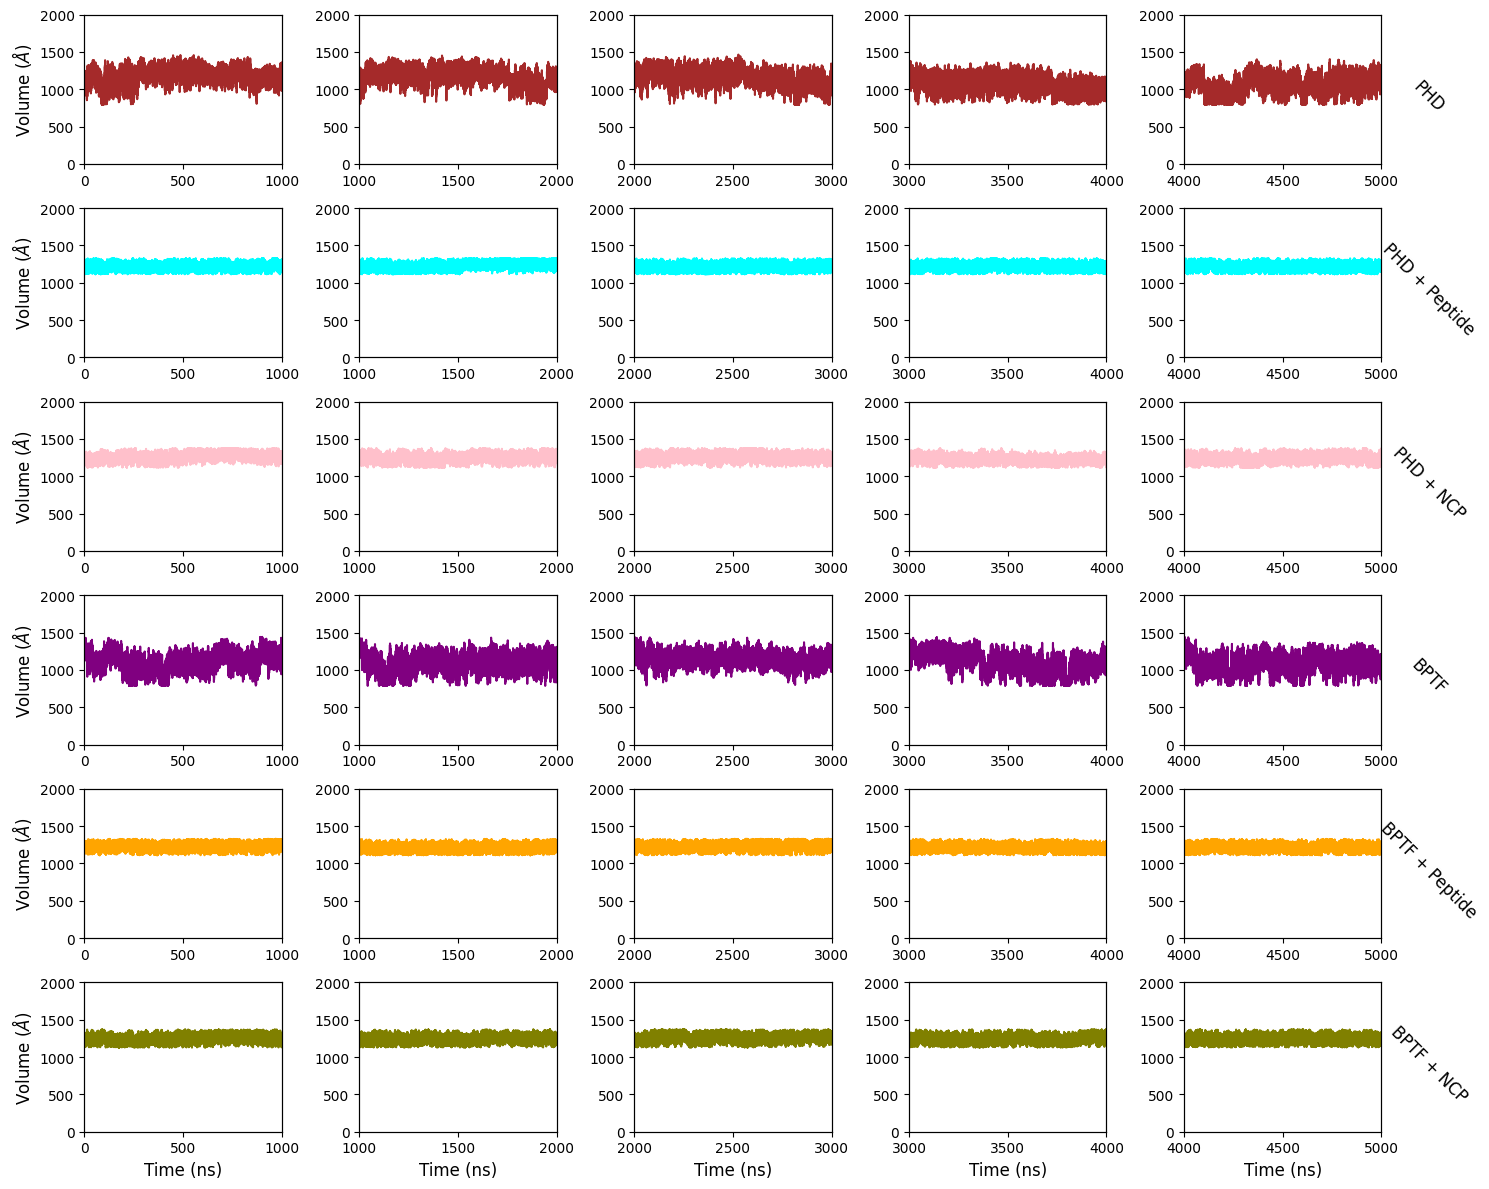

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from PIL import Image

font = {'family': 'sans-serif',
        'color': 'black',
        'weight': 'normal',
        'size': 12,  # Adjusted font size
        }

# Load data
x, y = np.loadtxt('notnob_volume.dat', unpack=True, usecols=(0,1), comments=('#'))
y_data_files = ['fingerex_volume.dat', 'EnoB_volume.dat', 'notail_volume.dat', '2f6jex_volume.dat', 'E_volume.dat']
y_datasets = [y] + [np.loadtxt(file, unpack=True, usecols=(1), comments=('#')) for file in y_data_files]

labels = ['PHD', 'PHD + Peptide', 'PHD + NCP', 'BPTF', 'BPTF + Peptide', 'BPTF + NCP']
colors = ['brown', 'cyan', 'pink', 'purple', 'orange', 'olive']

# Function to remove outliers
def remove_outliers(data, threshold=3.0):
    mean = np.mean(data)
    std = np.std(data)
    filtered_data = np.where(abs(data - mean) > threshold * std, np.nan, data)
    return np.interp(np.arange(len(data)), np.where(~np.isnan(filtered_data))[0], filtered_data[~np.isnan(filtered_data)])

# Apply outlier removal
y_datasets = [remove_outliers(y_data) for y_data in y_datasets]

# Setup figure and GridSpec
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(6, 5, figure=fig)

for i, (y_data, label, color) in enumerate(zip(y_datasets, labels, colors)):
    for j in range(5):  # 5 columns for each 1000 ns segment
        ax = fig.add_subplot(gs[i, j])
        start, end = j * 100000, (j + 1) * 100000
        ax.plot(x[start:end] / 100, y_data[start:end], color=color)
        ax.set_xlim(start / 100, end / 100)
        ax.set_ylim(0, 2000)
        ax.set_xticks(np.arange(start / 100, (end / 100) + 500, 500))
        ax.set_yticks(np.arange(0, 2500, 500))
        if i == 5:
            ax.set_xlabel('Time (ns)', fontdict=font)
        if j == 0:
            ax.set_ylabel('Volume ($\AA$)', fontdict=font)
        
        ax_right = ax.twinx()
        ax_right.set_yticks([])
        if j == 4:
            ax_right.set_ylabel(label, rotation=315, labelpad=35, fontdict=font)

fig.tight_layout()
plt.show()



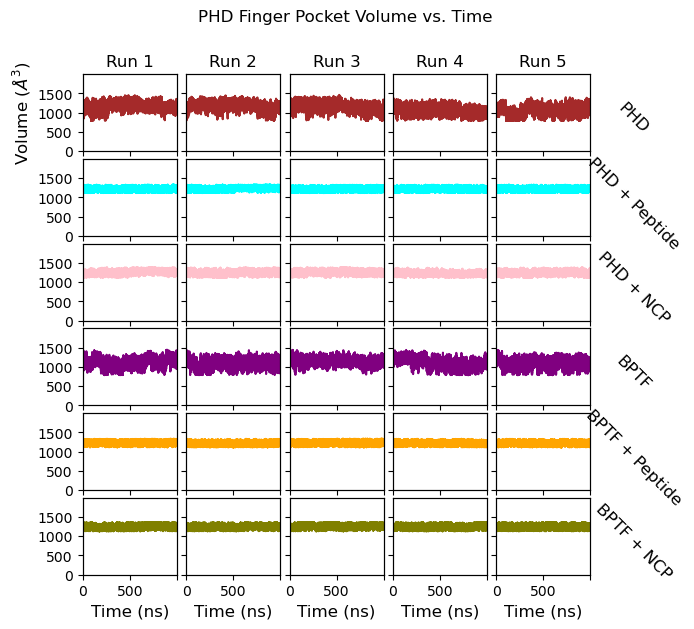

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from PIL import Image

font = {'family': 'sans-serif',
        'color': 'black',
        'weight': 'normal',
        'size': 12,  # Adjusted font size
        }

# Load data
x, y = np.loadtxt('notnob_volume.dat', unpack=True, usecols=(0,1), comments=('#'))
y_data_files = ['fingerex_volume.dat', 'EnoB_volume.dat', 'notail_volume.dat', '2f6jex_volume.dat', 'E_volume.dat']
y_datasets = [y] + [np.loadtxt(file, unpack=True, usecols=(1), comments=('#')) for file in y_data_files]

labels = ['PHD', 'PHD + Peptide', 'PHD + NCP', 'BPTF', 'BPTF + Peptide', 'BPTF + NCP']
colors = ['brown', 'cyan', 'pink', 'purple', 'orange', 'olive']

# Function to remove outliers
def remove_outliers(data, threshold=3.0):
    mean = np.mean(data)
    std = np.std(data)
    filtered_data = np.where(abs(data - mean) > threshold * std, np.nan, data)
    return np.interp(np.arange(len(data)), np.where(~np.isnan(filtered_data))[0], filtered_data[~np.isnan(filtered_data)])

# Apply outlier removal
y_datasets = [remove_outliers(y_data) for y_data in y_datasets]

# Setup figure and GridSpec
fig = plt.figure(figsize=(7, 6.5))
gs = GridSpec(6, 5, figure=fig, wspace=0.1, hspace=0.1)  # Reduced whitespace

for i, (y_data, label, color) in enumerate(zip(y_datasets, labels, colors)):
    for j in range(5):  # 5 columns for each 1000 ns segment
        ax = fig.add_subplot(gs[i, j])
        start, end = j * 100000, (j + 1) * 100000
        ax.plot(x[start:end] / 100, y_data[start:end], color=color)
        ax.set_xlim(start / 100, end / 100)
        ax.set_ylim(0, 2000)
        ax.set_xticks(np.arange(start / 100, (end / 100) + 500, 500))
        ax.set_yticks(np.arange(0, 2000, 500))
        
        # Show y tick labels only for leftmost column
        if j != 0:
            ax.set_yticklabels([])
        else:
            ax.set_yticklabels(np.arange(0,2000,500))
        
        if j==0 and i==0:
            ax.set_ylabel('Volume ($\AA^3$)', fontdict=font)
        # Show x tick labels only for bottom row
        if i != 5:
            ax.set_xticklabels([])
        else:
            ax.set_xticklabels(('0','500',''))
            ax.set_xlabel('Time (ns)', fontdict=font)
        
        ax_right = ax.twinx()
        ax_right.set_yticks([])
        if j == 4:
            ax_right.set_ylabel(label, rotation=315, labelpad=35, fontdict=font)
        if i==0:
            ax.set_title('Run '+str(j+1))
plt.suptitle('PHD Finger Pocket Volume vs. Time')
fig.subplots_adjust(right=0.85)  # Adjust right margin to fit labels
plt.savefig('pocket_volume.pdf', dpi=300, bbox_inches='tight')
#plt.tight_layout()
plt.show()
